In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# i am loading seaborn in-build dataset just for practice
df = sns.load_dataset('penguins')

In [5]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [8]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [9]:
df =df.fillna(df.mean(numeric_only=True))

In [10]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,NaN
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,Female
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,Male
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,Female


In [11]:
 df.groupby('species')['sex']

In [12]:
df['sex'] = df.groupby('species')['sex'].transform(lambda a: a.fillna(a.mode()[0]))


In [13]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [14]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [15]:
df['island'].unique()



array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

<Axes: xlabel='body_mass_g', ylabel='Count'>

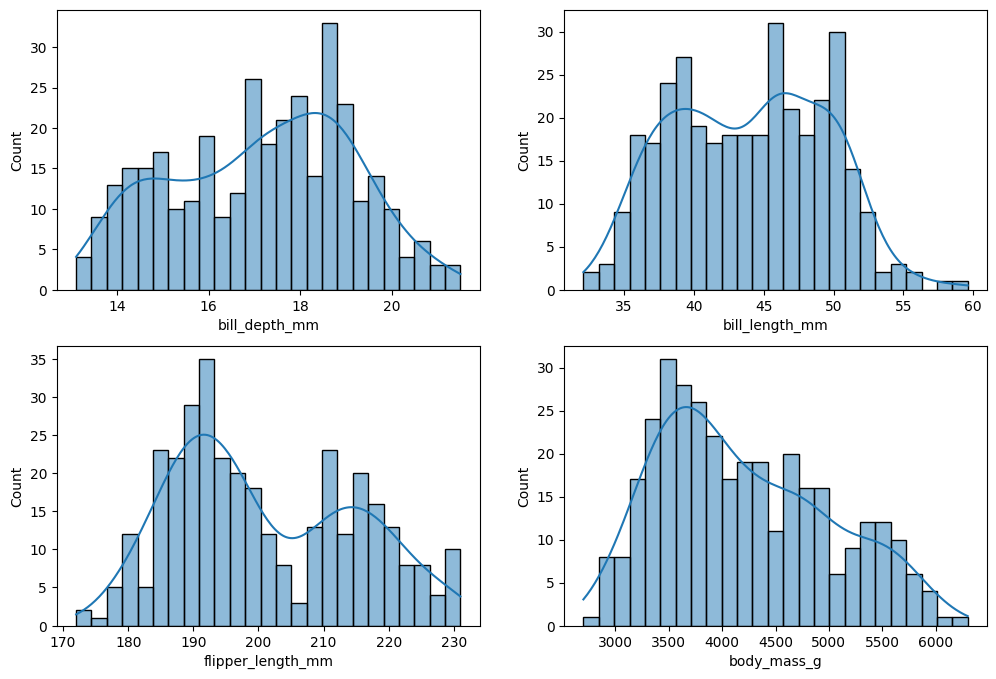

In [16]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.histplot(df['bill_depth_mm'],bins=25,kde=True)
plt.subplot(2,2,2)
sns.histplot(df['bill_length_mm'],bins=25,kde=True)
plt.subplot(2,2,3)
sns.histplot(df['flipper_length_mm'],bins = 25,kde=True)
plt.subplot(2,2,4)
sns.histplot(df['body_mass_g'],bins=25,kde=True)

In [17]:
number_cols = df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
number_cols.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<Axes: >

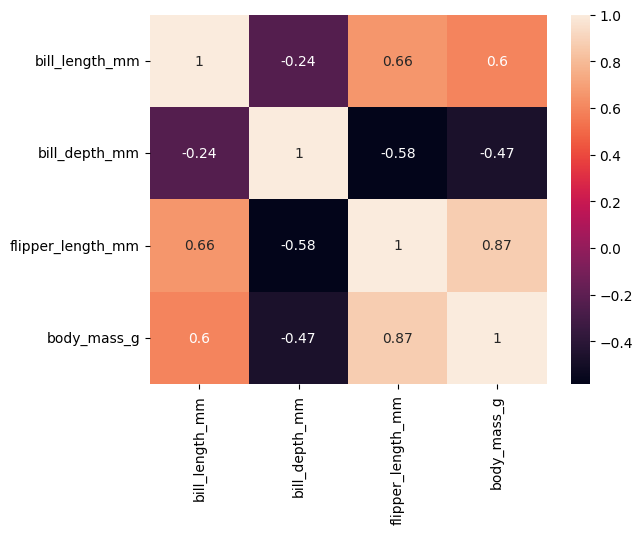

In [18]:
sns.heatmap(number_cols.corr(),annot=True)

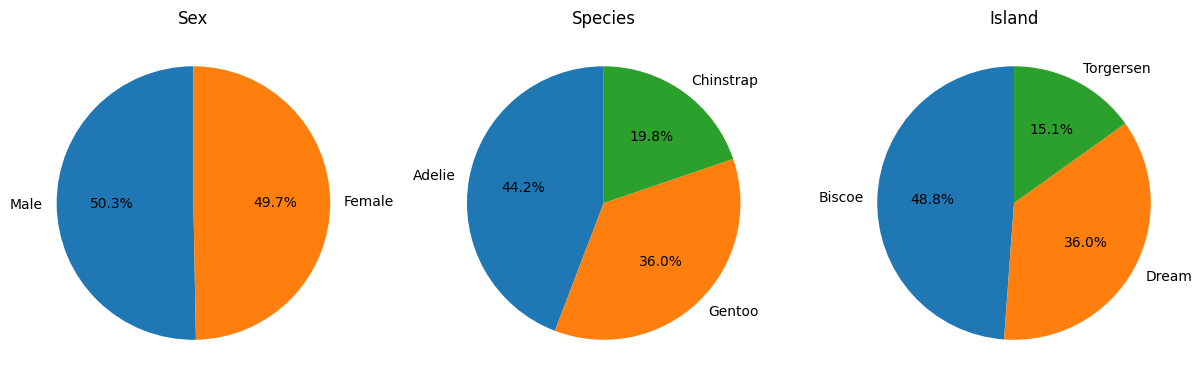

In [40]:
plt.figure(figsize=(15,40))
plt.subplot(1,3,1)
sex_cou = df['sex'].value_counts()
plt.pie(sex_cou.values,labels=sex_cou.index,autopct='%1.1f%%',startangle=90)
plt.title("Sex")
plt.subplot(1,3,2)
spec_cou = df['species'].value_counts()
plt.pie(spec_cou.values,labels=spec_cou.index,autopct='%1.1f%%',startangle=90)
plt.title('Species')
plt.subplot(1,3,3)
island_cou = df['island'].value_counts()
plt.pie(island_cou.values,labels=island_cou.index,autopct="%1.1f%%",startangle=90)
plt.title('Island')
plt.show()


<Axes: xlabel='bill_depth_mm', ylabel='bill_length_mm'>

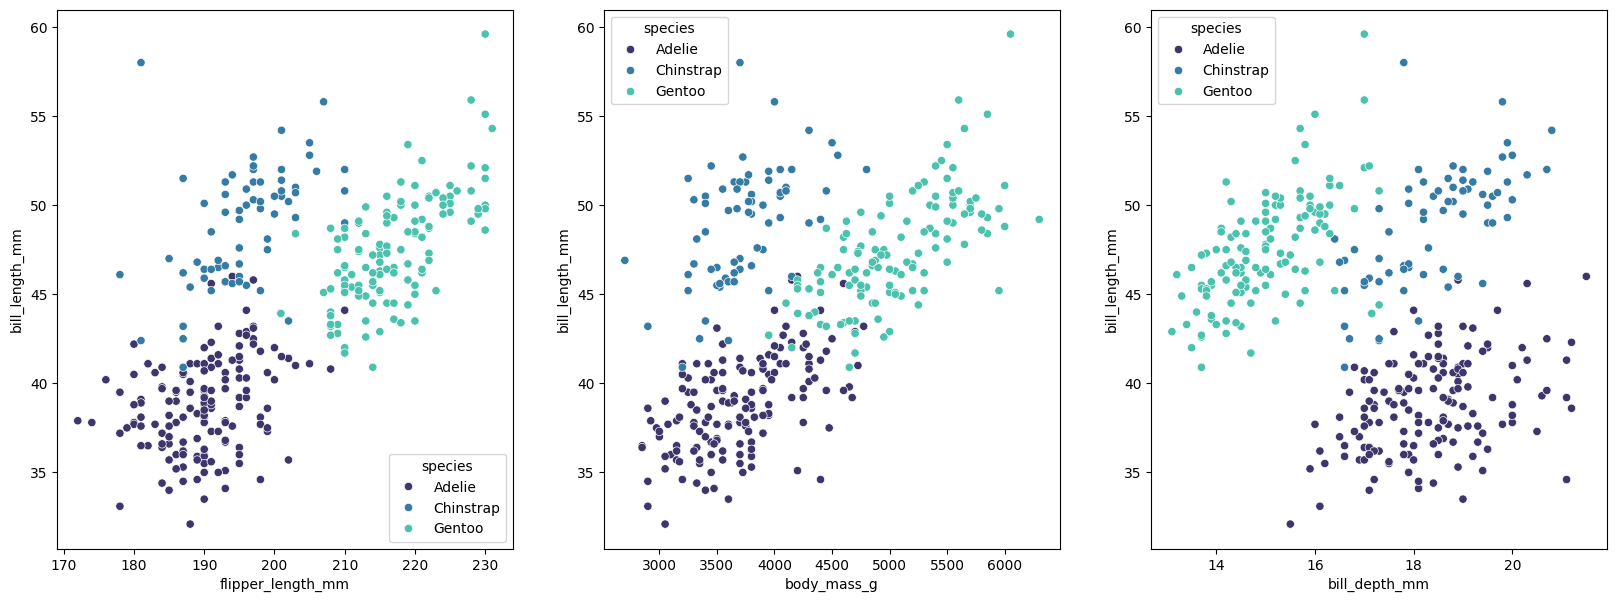

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(20,7))
plt.subplot(1,3,1)
sns.scatterplot(y='bill_length_mm',x='flipper_length_mm',hue='species',data=df,palette='mako')
plt.subplot(1,3,2)
sns.scatterplot(y='bill_length_mm',x='body_mass_g',hue='species',data=df,palette='mako')
plt.subplot(1,3,3)
sns.scatterplot(y='bill_length_mm',x='bill_depth_mm',hue='species',data=df,palette='mako')

<Figure size 400x400 with 0 Axes>

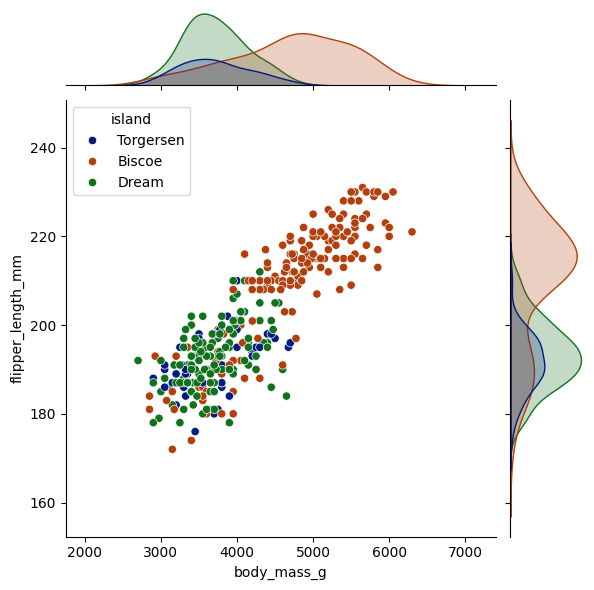

In [63]:
plt.figure(figsize=(4,4))
sns.jointplot(x='body_mass_g',y='flipper_length_mm',hue='island',data=df,kind='scatter',palette='dark')

<Figure size 400x400 with 0 Axes>

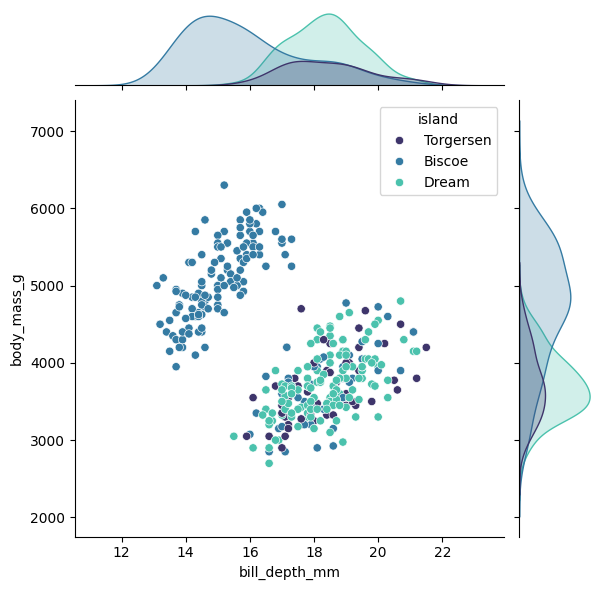

In [64]:
plt.figure(figsize=(4,4))
sns.jointplot(x='bill_depth_mm',y='body_mass_g',hue='island',data=df,kind='scatter',palette='mako')

<Figure size 400x400 with 0 Axes>

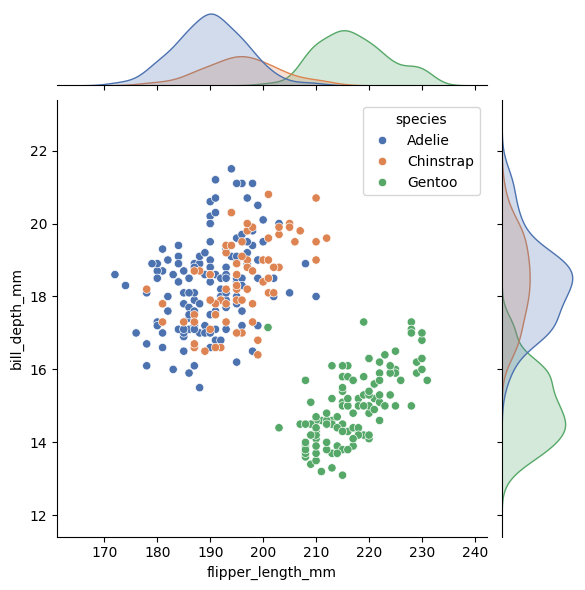

In [65]:
plt.figure(figsize=(4,4))
sns.jointplot(x='flipper_length_mm',y='bill_depth_mm',hue='species',data=df,kind='scatter',palette='deep')

<Figure size 400x400 with 0 Axes>

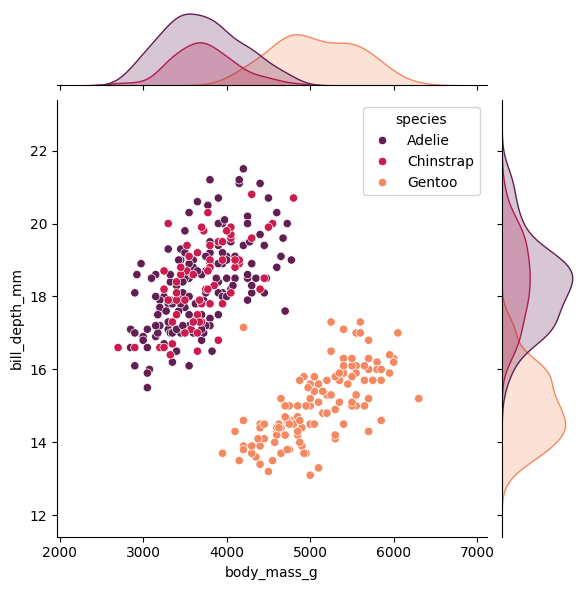

In [130]:
plt.figure(figsize=(4,4))
sns.jointplot(x='body_mass_g',y='bill_depth_mm',hue='species',data=df,kind='scatter',palette='rocket')

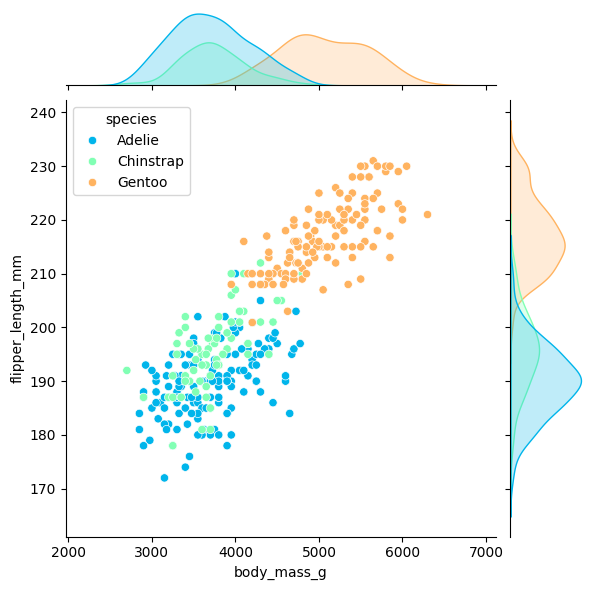

In [128]:
sns.jointplot(x='body_mass_g',y='flipper_length_mm',hue='species',data=df,kind='scatter',palette='rainbow')

In [100]:
# plt.pie(data=df,x=df['sex'].count())

<Axes: xlabel='sex', ylabel='count'>

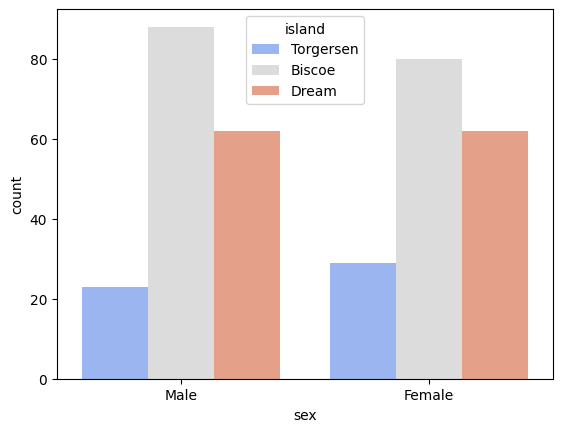

In [113]:
sns.countplot(data=df,x='sex',hue='island',palette='coolwarm')

<Axes: xlabel='island', ylabel='body_mass_g'>

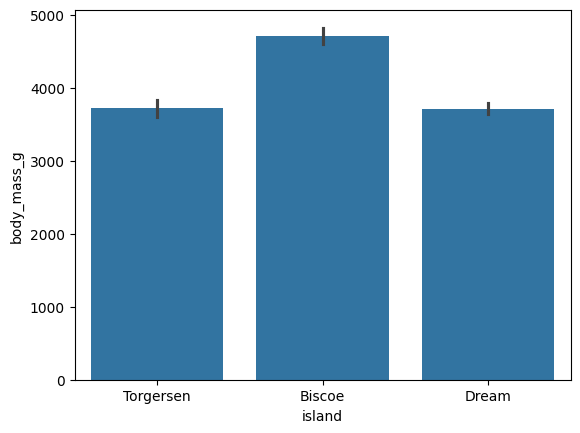

In [126]:
sns.barplot(data=df,x='island',y='body_mass_g',estimator=np.mean)

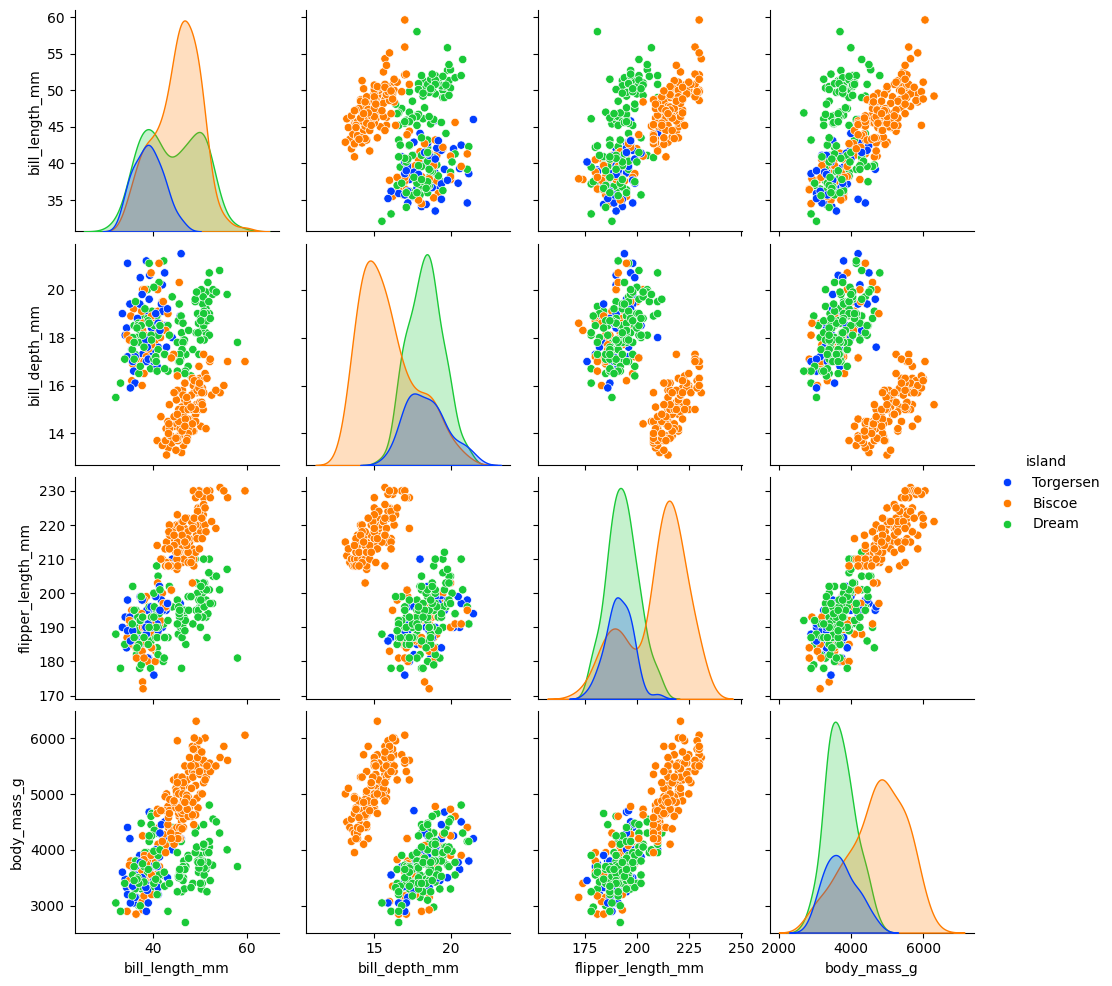

In [118]:
sns.pairplot(df,hue='island',palette='bright')

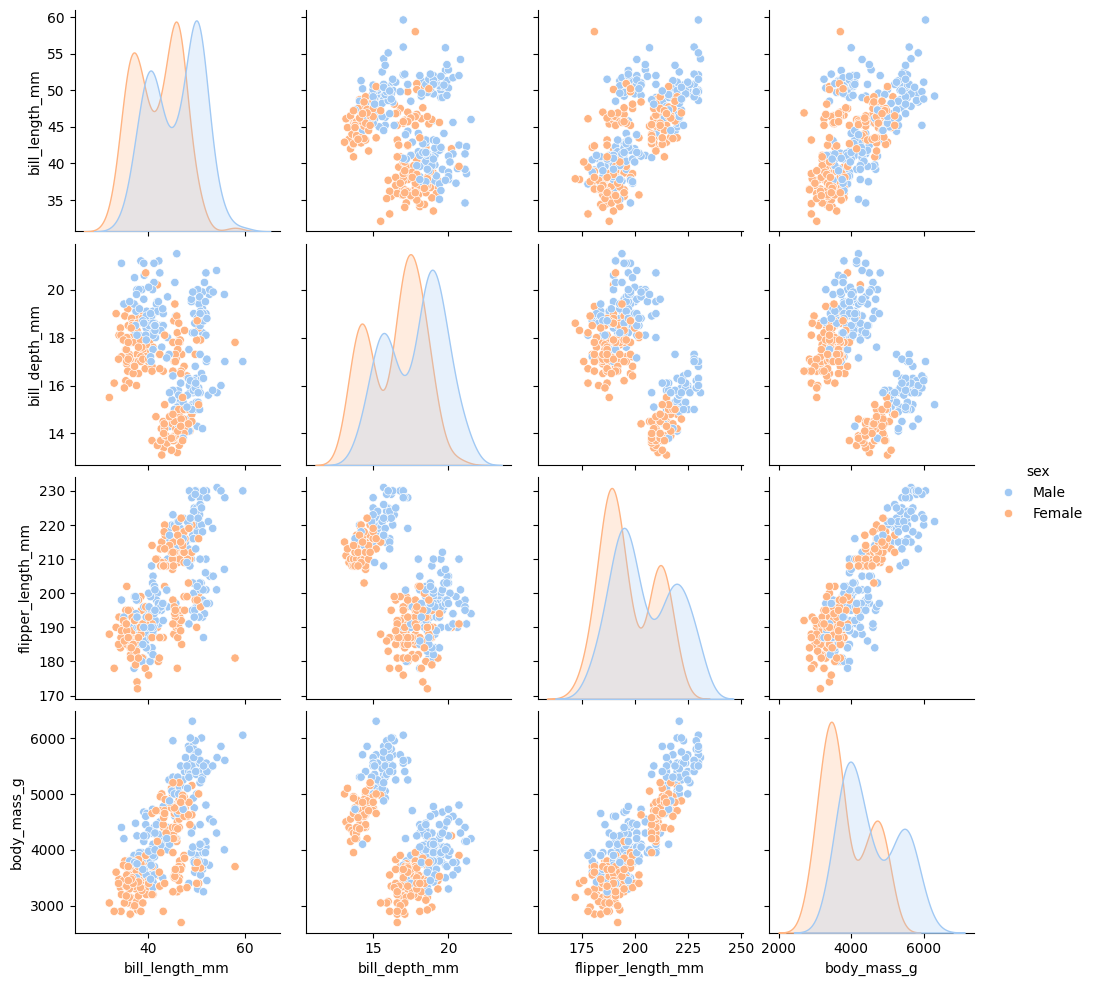

In [134]:
sns.pairplot(df,hue='sex',palette='pastel')

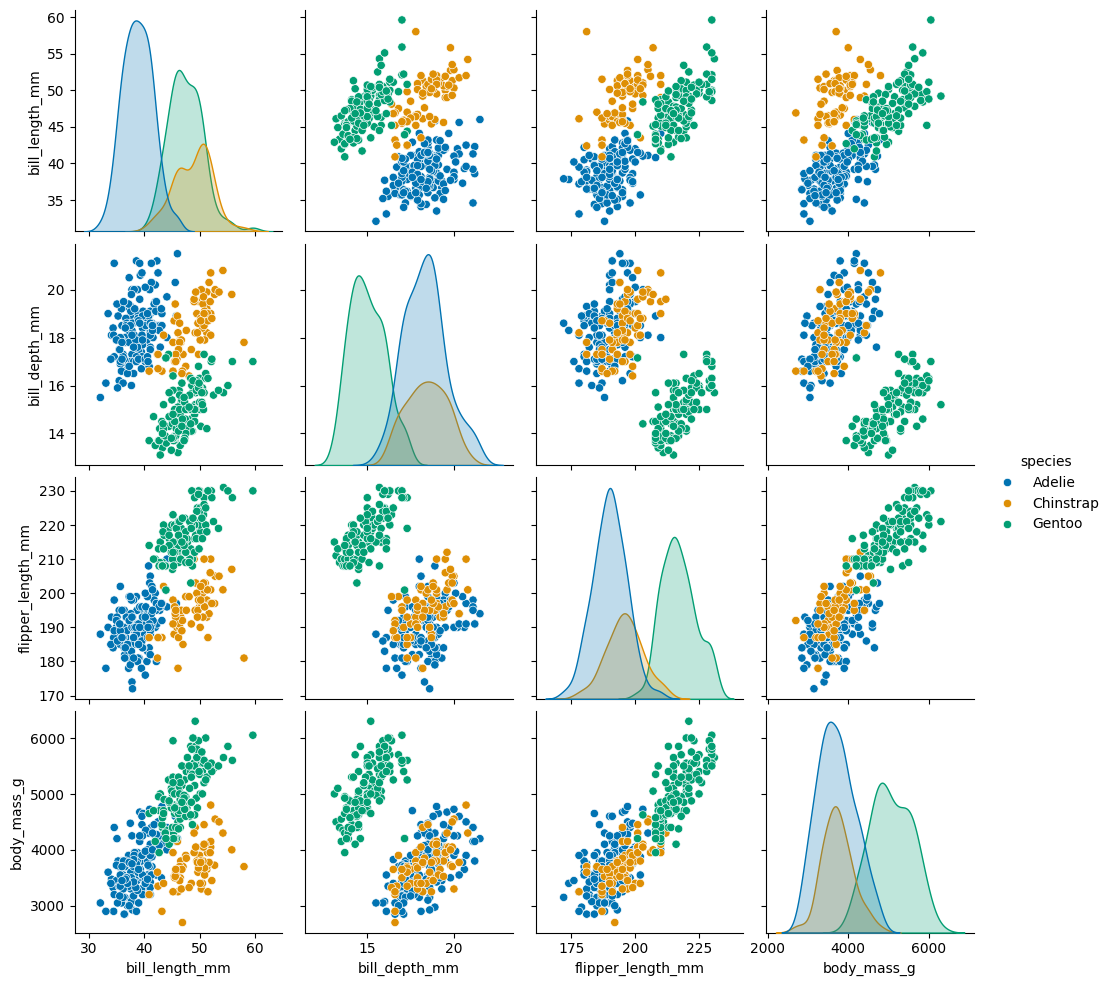

In [132]:
sns.pairplot(df,hue='species',palette='colorblind')